In [1]:
%pip --quiet install qiskit pylatexenc git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
%matplotlib inline

# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_textbook.tools import random_state
from qiskit.extensions import Initialize

# Loading your IBM Q account(s)
# IBMQ.load_account()
backend = Aer.get_backend('qasm_simulator')

Note: you may need to restart the kernel to use updated packages.


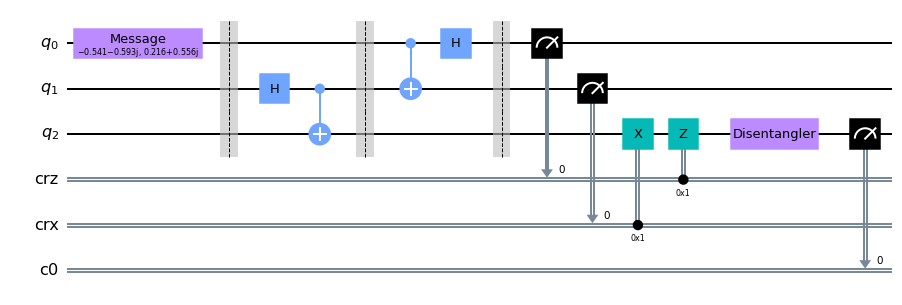

In [2]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

# Information to be sent 
msg = random_state(1)
init_gate = Initialize(msg)
init_gate.name = 'Message'

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
qc.h(1) # Put qubit 1 into state |+>
qc.cx(1, 2) # CNOT with 1 as control and 2 as target
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
qc.cx(0, 1)
qc.h(0)
qc.barrier()

## STEP 3
# Alice then sends her classical bits to Bob
qc.measure([0, 1], [0, 1])

## STEP 4
# Bob decodes qubits
# Here we use c_if to control our gates with a classical bit instead of a qubit
qc.x(2).c_if(crx, 1) # Apply gates if the registers 
qc.z(2).c_if(crz, 1) # are in the state '1'

## STEP 5
# reverse the initialization process
qc.append(init_gate.gates_to_uncompute(), [2])

## STEP 6
# measure the transferred qubit information
qc.add_register(ClassicalRegister(1))
qc.measure(2, 2)

# Display the circuit
qc.draw('mpl')

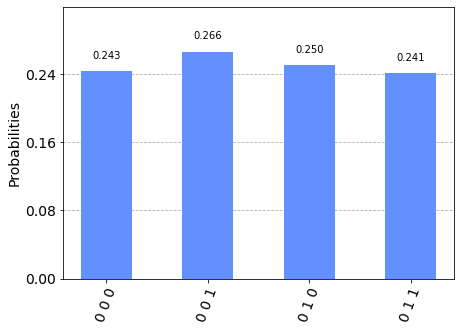

In [3]:
results = execute(qc, backend=backend).result()
answer = results.get_counts()
plot_histogram(answer)